# 数据分析
本代码文档完成数据导入以及数据分析.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from trainer.rebuilding_features import load_batches_to_dict
from trainer.data_preprocessing import preprocess_batch, preprocess_cycle#, plot_preprocessing_results
from trainer.helpers import print_dict_keys

## 数据预处理

### 最终数据结构

#### Batch
- ["b1c1"]


    - ["cycle_life"]

    - ["summary"]
        - ["IR"]
        - ["QD"]
        - ["remaining_cycle_life"]
        - ["high_current_discharging_time"]

    - ["cycles"]
        - ["1"]
            -["Qd_resample"]
            -["T_resample"]
            -["V_resample"]

            Only if specified in preprocessing function with "return_original_data":
            -["Qd_original_data"]
            -["T_original_data"]
            -["V_original_data"]
            -["t_original_data"]

        - ["2"] ...
        - ["3"] ...


- ["b1c2"] ...

### 导入待分析数据

In [3]:
print('Start import analysis data, it may take 35 secs')
batch1 = load_batches_to_dict(amount_to_load=1)

Start import analysis data, it may take 35 secs
Loading batch1 ...
Done loading batches


### 数据预处理

In [7]:
# print(np.__version__)
# # !pip install numpy==1.18.4
# import numpy as np
# print(np.__version__)

# import tensorflow as tf
# print(tf.__version__)

# results = preprocess_batch(batch1, return_original_data=True, verbose=True)

# print_dict_keys(results, max_depth=1)

1.18.4
1.18.4

1.15.2
Start processing data ...
    Interpolated small Qd outlier from index 34 to 42
b1c0 done
b1c1 done
b1c2 done
cell: b1c3  cycle: 11
    Dropping cycle based on outliers with np.diff(t) > 100 with value(s) [407.7868733333333]

b1c3 done
cell: b1c4  cycle: 11
    Dropping cycle based on outliers with np.diff(t) > 100 with value(s) [407.7970250000001]

    Interpolated small Qd outlier from index 176 to 186
b1c4 done
cell: b1c5  cycle: 908
    Dropping cycle based on outliers with np.diff(t) > 100 with value(s) [264.66089166666694]

b1c5 done
    Interpolated small Qd outlier from index 75 to 84
b1c6 done
    Interpolated small Qd outlier from index 84 to 92
b1c7 done
b1c9 done
    Interpolated small Qd outlier from index 152 to 162
b1c11 done
    Interpolated small Qd outlier from index 182 to 191
b1c14 done
    Interpolated small Qd outlier from index 167 to 175
b1c15 done
b1c16 done
    Interpolated small Qd outlier from index 206 to 214
b1c17 done
b1c18 done
b1c1

### 选取一组数据，进行数据分析与理解

In [5]:
cell1 = batch1["b1c2"]
cycle = cell1["cycles"]["2"]

I = cycle["I"]
Qd = cycle["Qd"]
T = cycle["T"]
V = cycle["V"]
t = cycle["t"]
print(Qd)
print(Qd.size)

[0.        0.        0.        ... 1.0813154 1.0813154 1.0813154]
1124


### 绘制时序曲线

Text(0.5, 0, 'time')

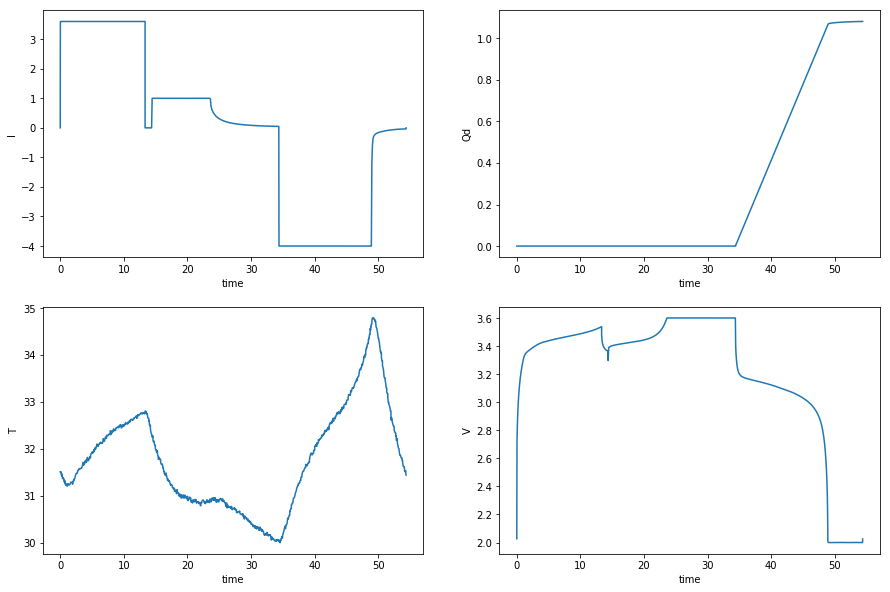

In [6]:
# Plots over time

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax[0][0].plot(t, I)
ax[0][0].set_ylabel("I")
ax[0][0].set_xlabel("time")

ax[0][1].plot(t, Qd)
ax[0][1].set_ylabel("Qd")
ax[0][1].set_xlabel("time")

ax[1][0].plot(t, T)
ax[1][0].set_ylabel("T")
ax[1][0].set_xlabel("time")

ax[1][1].plot(t, V)
ax[1][1].set_ylabel("V")
ax[1][1].set_xlabel("time")

Text(0.5, 0, 'V')

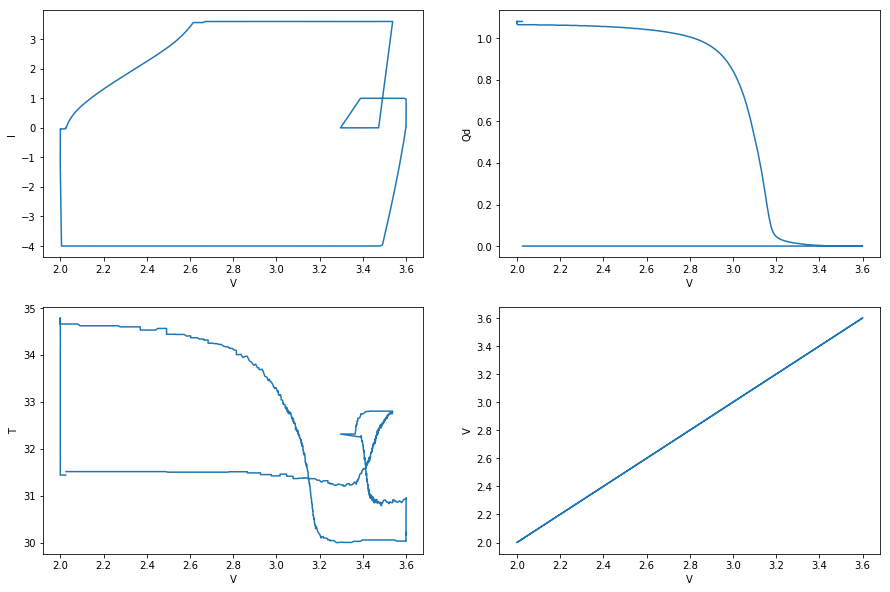

In [7]:
# Plots over Voltage

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax[0][0].plot(V, I)
ax[0][0].set_ylabel("I")
ax[0][0].set_xlabel("V")

ax[0][1].plot(V, Qd)
ax[0][1].set_ylabel("Qd")
ax[0][1].set_xlabel("V")

ax[1][0].plot(V, T)
ax[1][0].set_ylabel("T")
ax[1][0].set_xlabel("V")

ax[1][1].plot(V, V)
ax[1][1].set_ylabel("V")
ax[1][1].set_xlabel("V")

### 绘制大电流放电场景下的检测数据

Text(0.5, 0, 'T')

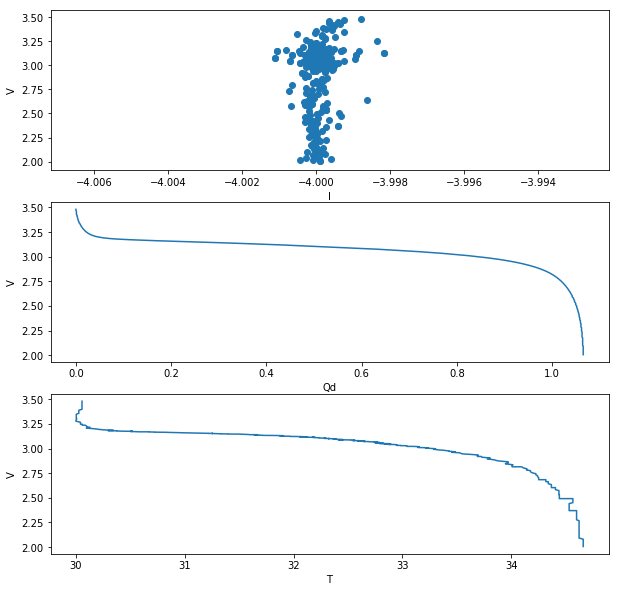

In [8]:
#Plot only the measurements during high current discharging

cond = I < -3.99

fig, ax = plt.subplots(nrows=3, figsize=(10, 10))
ax[0].scatter(I[cond], V[cond])
ax[0].set_ylabel("V")
ax[0].set_xlabel("I")

ax[1].plot(Qd[cond], V[cond])
ax[1].set_ylabel("V")
ax[1].set_xlabel("Qd")

ax[2].plot(T[cond], V[cond])
ax[2].set_ylabel("V")
ax[2].set_xlabel("T")

i: 100  size Qd: 344
i: 200  size Qd: 329
i: 300  size Qd: 344
i: 400  size Qd: 327
i: 500  size Qd: 340
i: 600  size Qd: 337
i: 700  size Qd: 330
i: 800  size Qd: 314
i: 900  size Qd: 330
i: 1000  size Qd: 320
i: 1100  size Qd: 345


[]

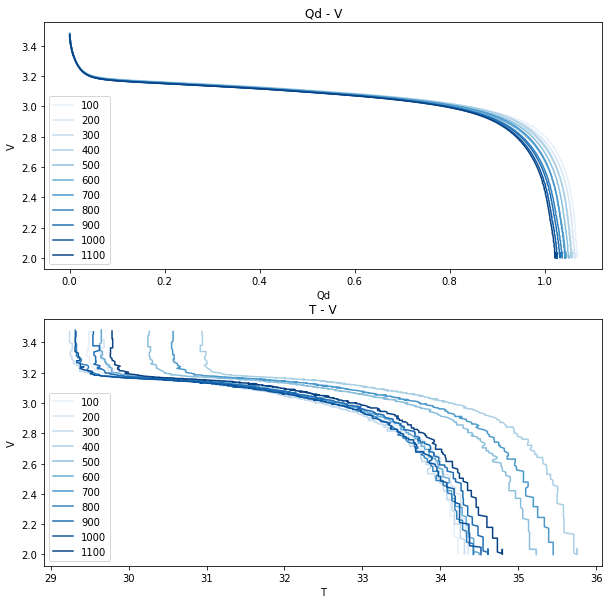

In [9]:
# Visualizing the effect of the I threshold on Qd and T

I_thresh = -3.99

fig, ax = plt.subplots(nrows=2, figsize=(10, 10))

for i, cycle in enumerate(cell1["cycles"].values()):
    if i == 0:
        continue
    if i % 100 == 0:
        mask = cycle["I"] < I_thresh
        print("i:", i, " size Qd:", cycle["Qd"][mask].size)

        ax[0].plot(cycle["Qd"][mask], cycle["V"][mask], label=i, color=plt.cm.Blues(i/len(cell1["cycles"])))
        ax[0].set_title("Qd - V")

        ax[1].plot(cycle["T"][mask], cycle["V"][mask], label=i, color=plt.cm.Blues(i/len(cell1["cycles"])))
        ax[1].set_title("T - V")
ax[0].set_ylabel("V")
ax[0].set_xlabel("Qd")
ax[1].set_ylabel("V")
ax[1].set_xlabel("T")
ax[0].legend()
ax[1].legend()
plt.plot()